In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumGothic')

In [74]:
train = pd.read_csv('train_for_model_2015.csv')
test = pd.read_csv('test_for_model_2015.csv')

In [75]:
train.head(2)

,전용면적(㎡),계약년월,층,건축년도,구,회사채금리,매매가격지수,건설공사비지수,거래량,버스정류장수,...,아파트명,x좌표,y좌표,대장아파트거리,버스거리,지하철거리,지하철접근성,학교거리,학군,target
0,79.97,201712,저층,1987,강남구,2.649,85.9,92.15,8547,86.0,...,일반,127.056859,37.476276,6.615218,0.094275,1.187672,3,0.482296,6.0,124000
1,79.97,201712,저층,1987,강남구,2.649,85.9,92.15,8547,86.0,...,일반,127.056859,37.476276,6.615218,0.094275,1.187672,3,0.482296,6.0,123500


In [76]:
test.head(2)

,전용면적(㎡),계약년월,층,건축년도,구,회사채금리,매매가격지수,건설공사비지수,거래량,버스정류장수,...,강남권여부,아파트명,x좌표,y좌표,대장아파트거리,버스거리,지하철거리,지하철접근성,학교거리,학군
0,79.9700,202307,저층,1987,강남구,4.437,93.0,127.33,3593,86.0,...,1,일반,127.056859,37.476276,6.615218,0.094275,1.187672,3,0.482296,6.0
1,108.2017,202308,중층,2021,강남구,4.500,93.4,127.39,3868,86.0,...,1,더샵,127.057257,37.484829,5.776445,0.108333,0.264330,5,0.559325,6.0


In [111]:
df = train.copy()

In [112]:
# 1. 전용면적 로그 변환
df["전용면적(log)"] = np.log1p(df["전용면적(㎡)"])   
df.head()

,전용면적(㎡),계약년월,층,건축년도,구,회사채금리,매매가격지수,건설공사비지수,거래량,버스정류장수,...,x좌표,y좌표,대장아파트거리,버스거리,지하철거리,지하철접근성,학교거리,학군,target,전용면적(log)
0,79.97,201712,저층,1987,강남구,2.649,85.9,92.15,8547,86.0,...,127.056859,37.476276,6.615218,0.094275,1.187672,3,0.482296,6.0,124000,4.394079
1,79.97,201712,저층,1987,강남구,2.649,85.9,92.15,8547,86.0,...,127.056859,37.476276,6.615218,0.094275,1.187672,3,0.482296,6.0,123500,4.394079
2,54.98,201712,저층,1987,강남구,2.649,85.9,92.15,8547,86.0,...,127.056859,37.476276,6.615218,0.094275,1.187672,3,0.482296,6.0,91500,4.024994
3,79.97,201801,저층,1987,강남구,2.722,87.0,93.52,12566,86.0,...,127.056859,37.476276,6.615218,0.094275,1.187672,3,0.482296,6.0,130000,4.394079
4,79.97,201801,저층,1987,강남구,2.722,87.0,93.52,12566,86.0,...,127.056859,37.476276,6.615218,0.094275,1.187672,3,0.482296,6.0,117000,4.394079


In [113]:
# 2. 구간화 
conditions = [
    df['전용면적(㎡)'] < 59,
    (df["전용면적(㎡)"] >= 59) & (df["전용면적(㎡)"] < 60),  
    (df["전용면적(㎡)"] >= 60) & (df["전용면적(㎡)"] < 84), 
    (df["전용면적(㎡)"] >= 84) & (df["전용면적(㎡)"] < 85), 
    df['전용면적(㎡)'] >= 85
]

choices = ["59㎡미만","약59㎡","60㎡이상84㎡미만","약84㎡","85㎡이상"]

df["전용면적구간"] = np.select(conditions, choices)
df[["전용면적(㎡)", "전용면적구간"]].head()

,전용면적(㎡),전용면적구간
0,79.97,60㎡이상84㎡미만
1,79.97,60㎡이상84㎡미만
2,54.98,59㎡미만
3,79.97,60㎡이상84㎡미만
4,79.97,60㎡이상84㎡미만


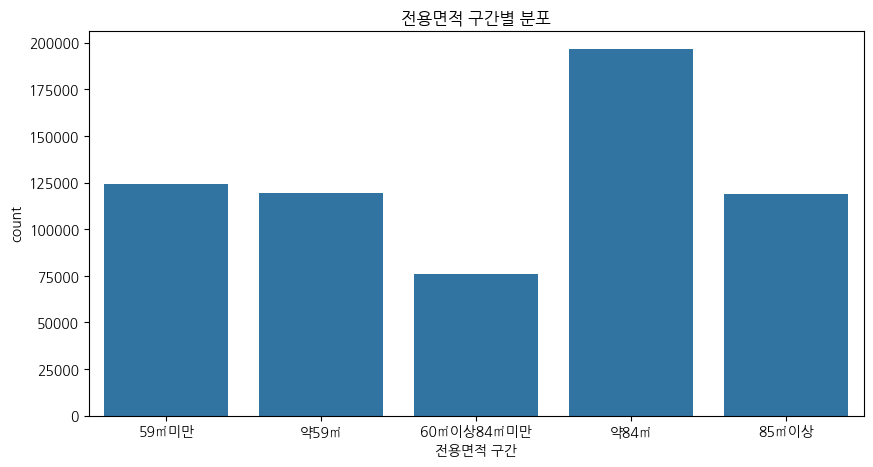

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(x='전용면적구간', data=df, order=["59㎡미만","약59㎡","60㎡이상84㎡미만","약84㎡","85㎡이상"])
plt.title("전용면적 구간별 분포")
plt.xlabel("전용면적 구간")
plt.show()

In [114]:
# 3. 평수 변환
df["평수"] = df["전용면적(㎡)"] / 3.3
df['평수']

0         24.233333
1         24.233333
2         16.660606
3         24.233333
4         24.233333
            ...    
635462    25.733333
635463    15.896970
635464    15.896970
635465    15.896970
635466    15.896970
Name: 평수, Length: 635467, dtype: float64

In [100]:
4. 가격 대비 면적
㎡당 가격 
df["가격대비면적"] = df["target"] / df["전용면적(㎡)"]
df['가격대비면적']

# 로그스케일 
df["가격대비면적(log)"] = np.log1p(df["가격대비면적"])  
df["가격대비면적(log)"]

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(df['가격대비면적'], bins=100)
plt.title("가격대비면적 분포")
plt.xlabel("가격대비면적")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['가격대비면적'])
plt.title("가격대비면적 박스플롯 (이상치 확인)")
plt.xlabel("가격대비면적")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['가격대비면적(log)'], bins=100)
plt.title("가격대비면적 분포")
plt.xlabel("가격대비면적")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['가격대비면적(log)'])
plt.title("가격대비면적 박스플롯 (이상치 확인)")
plt.xlabel("가격대비면적")
plt.show()

In [84]:
# 5. 연식과의 상호작용

계약년도 = pd.to_datetime(df["계약년월"].astype(str), format="%Y%m").dt.year

# 건물 연식 (계약 시점 기준)
df["연식"] = 계약년도 - df["건축년도"]

# 1. 전용면적 × 연식
df["전용면적x연식"] = df["전용면적(㎡)"] * df["연식"]

# 2. 전용면적 ÷ 연식 
df["전용면적/연식"] = df["전용면적(㎡)"] / (df["연식"])  

df.head()

In [85]:
# 1. 전용면적 x 연식 vs target 산점도
plt.figure(figsize=(10,5))
sns.scatterplot(x='전용면적x연식', y='target', data=df, alpha=0.5)
plt.title("전용면적 × 연식 vs 거래가격")
plt.xlabel("전용면적 × 연식")
plt.ylabel("거래가격")
plt.show()

# 2. 전용면적 ÷ 연식 vs target 산점도 -> 고가아파트 분리할 때 필요
plt.figure(figsize=(10,5))
sns.scatterplot(x='전용면적/연식', y='target', data=df, alpha=0.5)
plt.title("전용면적 ÷ 연식 vs 거래가격")
plt.xlabel("전용면적 ÷ 연식")
plt.ylabel("거래가격")
plt.show()


In [86]:
# 전용면적 × 건물연식 → 오래된 대형 vs 신축 대형
# plt.figure(figsize=(10,5))
# sns.histplot(df['전용면적(㎡)x연식'], bins=100)
# plt.title("전용면적 × 연식 분포")
# plt.xlabel("전용면적 × 연식")
# plt.ylabel("빈도")
# plt.show()

# 전용면적 × 학군 점수 
# 전용면적 × 교통 편의 

In [87]:
# df.to_csv("fe_exclusive_area.csv")

In [88]:
school = pd.read_csv("서울시학교(초+중+고).csv")

In [89]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학교종류명     1318 non-null   object 
 1   설립구분      1318 non-null   object 
 2   고등학교 구분명  318 non-null    object 
 3   학교명       1318 non-null   object 
 4   도로명주소     1318 non-null   object 
 5   위도        1318 non-null   float64
 6   경도        1318 non-null   float64
dtypes: float64(2), object(5)
memory usage: 72.2+ KB


In [90]:
school.head()

,학교종류명,설립구분,고등학교 구분명,학교명,도로명주소,위도,경도
0,초등학교,공립,NaN,서울숭신초등학교,서울특별시 성동구 마장로 161,37.567696,127.027804
1,초등학교,사립,NaN,한양초등학교,서울특별시 성동구 살곶이길 208,37.561387,127.043692
2,초등학교,사립,NaN,세종초등학교,서울특별시 광진구 군자로 114,37.550734,127.074131
3,초등학교,사립,NaN,성동초등학교,서울특별시 광진구 자양로4길 63,37.532937,127.089532
4,초등학교,공립,NaN,서울행현초등학교,서울특별시 성동구 행당로 95,37.557740,127.029361


In [91]:
school['고등학교 구분명'].unique()

array([nan, '일반고', '특성화고', '특목고', '자율고'], dtype=object)

In [92]:
# 최근접 초등학교까지 거리
# 최근접 중학교까지 거리
# 최근접 고등학교까지 거리
# 반경 1km 내 초등학교 수
# 반경 1km 내 중학교 수
# 반경 2km 내 고등학교 수
# 2km 내 특목/자사고 여부

In [93]:
df['아파트명'].unique()

array(['일반', '자이', '주공', '래미안', '롯데캐슬', 'e편한세상', '센트레빌', '더샵', '아이파크',
       '푸르지오', '힐스테이트', '스위첸', '유보라'], dtype=object)

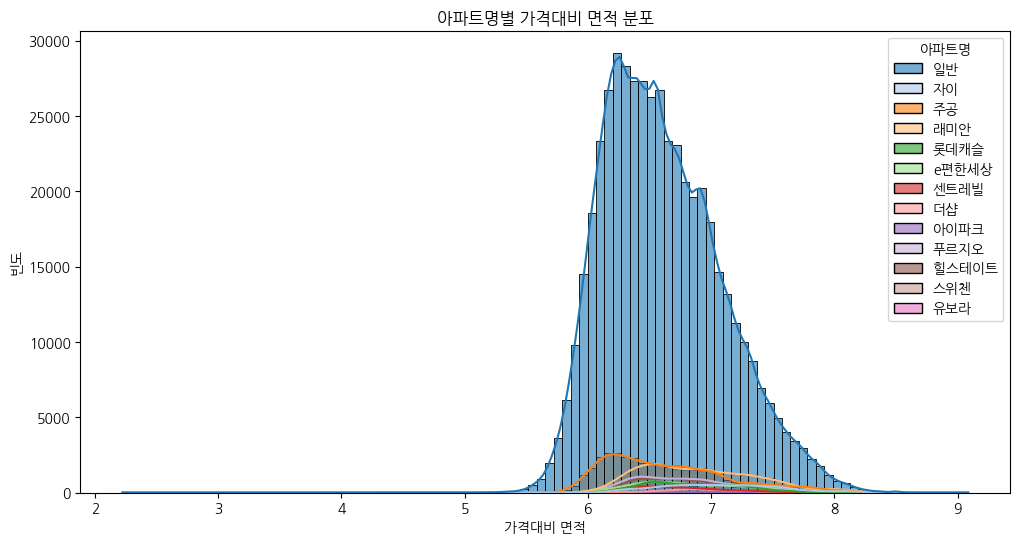

In [101]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=df,
    x ='가격대비면적(log)',
    hue='아파트명',     
    bins=100,
    kde=True,
    palette='tab20',    
    alpha=0.6
)
plt.title("아파트명별 가격대비 면적 분포")
plt.xlabel("가격대비 면적")
plt.ylabel("빈도")
plt.show()

In [97]:
df.head()

,전용면적(㎡),계약년월,층,건축년도,구,회사채금리,매매가격지수,건설공사비지수,거래량,버스정류장수,...,대장아파트거리,버스거리,지하철거리,지하철접근성,학교거리,학군,target,전용면적(log),전용면적구간,평수
0,79.97,201712,저층,1987,강남구,2.649,85.9,92.15,8547,86.0,...,6.615218,0.094275,1.187672,3,0.482296,6.0,124000,4.394079,60㎡이상84㎡미만,24.233333
1,79.97,201712,저층,1987,강남구,2.649,85.9,92.15,8547,86.0,...,6.615218,0.094275,1.187672,3,0.482296,6.0,123500,4.394079,60㎡이상84㎡미만,24.233333
2,54.98,201712,저층,1987,강남구,2.649,85.9,92.15,8547,86.0,...,6.615218,0.094275,1.187672,3,0.482296,6.0,91500,4.024994,59㎡미만,16.660606
3,79.97,201801,저층,1987,강남구,2.722,87.0,93.52,12566,86.0,...,6.615218,0.094275,1.187672,3,0.482296,6.0,130000,4.394079,60㎡이상84㎡미만,24.233333
4,79.97,201801,저층,1987,강남구,2.722,87.0,93.52,12566,86.0,...,6.615218,0.094275,1.187672,3,0.482296,6.0,117000,4.394079,60㎡이상84㎡미만,24.233333
